<a href="https://colab.research.google.com/drive/1ZTUZe_dvWPmM8pPAilJi6Y3UXpCHVR_W?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning SP 2022/2023

- Prof. Cesare Alippi
- Giorgia Adorni ([`giorgia.adorni@usi.ch`](mailto:giorgia.adorni@usi.ch))<br>
- Fatima Ezzeddine ([`fatima.ezzeddine@usi.ch`](mailto:fatima.ezzeddine@usi.ch))<br>
- Alessandro Manenti ([`alessandro.manenti@usi.ch`](mailto:alessandro.manenti@usi.ch))

---
# Lab 07: Unsupervised learning

In this lab, we will see practical applications of unsupervised learning techniques.

We will focus on two main tasks:

1. Clustering;
3. Dimensionality reduction.

We will use two datasets that we are now very familiar with:
 - [Iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)
 - [MNIST](https://keras.io/api/datasets/mnist/)


## 7.1 Clustering the Iris dataset

---

In this task, we analyze the Iris dataset by considering **only the features**, without the targets (i.e., the classes). Let's start by loading the dataset and getting a sense of it.

In [1]:
from sklearn.datasets import load_iris

# load the data
iris = load_iris()

# list the keys
print(list(iris.keys()))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [2]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [3]:
# read the keys
print('feature_names:\n', iris['feature_names'])
print()
print('target_names:\n', iris['target_names'])
print()
print('data:\n', iris['data'][:10])
print()
print('target:\n', iris['target'])

feature_names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target_names:
 ['setosa' 'versicolor' 'virginica']

data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
# extract data
X = iris.data

**Remark:** This should be an **unsupervised** learning setup. So, even though `iris.target` is present, we assume to have **no label** associated with the data.

Now let's see the shapes of the data.

In [5]:
print('Shape of X:', X.shape)

(n, d) = X.shape
print('d:', d)
print('n:', n)

Shape of X: (150, 4)
d: 4
n: 150


### 7.1.1 Data visualization

---


#### Histograms

Let's see the estimated pdf of each component (i.e., feature) by means of the histograms.

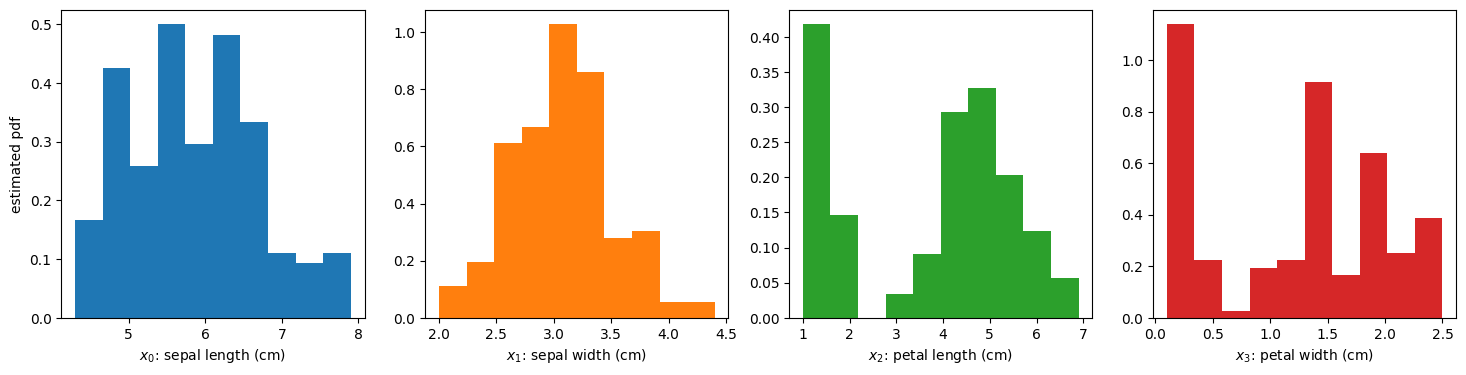

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 4))

for i in range(d):
    # a subplot for each feature
    plt.subplot(1, d, i+1)

    # histogram
    plt.hist(X[:, i], density=True, color=f'C{i}')

    # axis labels
    plt.xlabel('$x_{}$: {}'.format(i, iris.feature_names[i]))
    if i == 0:  plt.ylabel('estimated pdf')

plt.show()

A couple of observations:

* the different ranges
* $x_2$ and $x_3$ are roughly bimodal


#### Scatter plots

We try to plot more features at the same time. We have 4 features but we can visualize at most 3D.


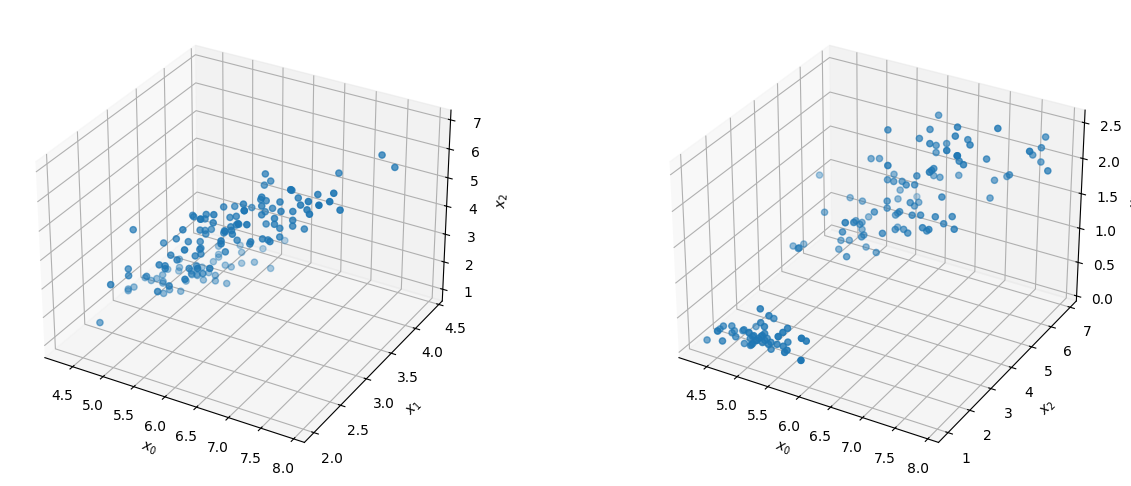

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 6))

# x0, x1, x2
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$x_2$')

# x0, x2, x3
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X[:, 0], X[:, 2], X[:, 3])
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

It seems that we can identify in a easier way clusters by watching $x_0, x_2$ and $x_3$ jointly instead of $x_0, x_1$ and $x_2$. Can't we?
Or maybe it just depends on where we are looking at the data from...

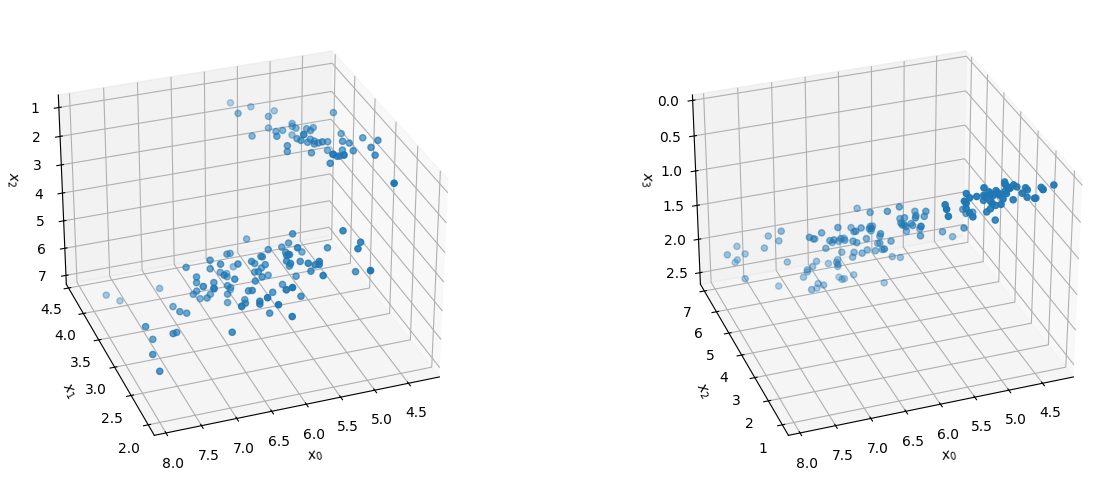

In [8]:
fig = plt.figure(figsize=(15, 6))

# x0, x1, x2
ax = fig.add_subplot(121, projection='3d', elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$x_2$')

# x0, x2, x3
ax = fig.add_subplot(122, projection='3d', elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 2], X[:, 3])
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

Without the right perspective we may miss important clues.

2D plots are usually clearer than 3D ones (personal opinion!), let's try with them.


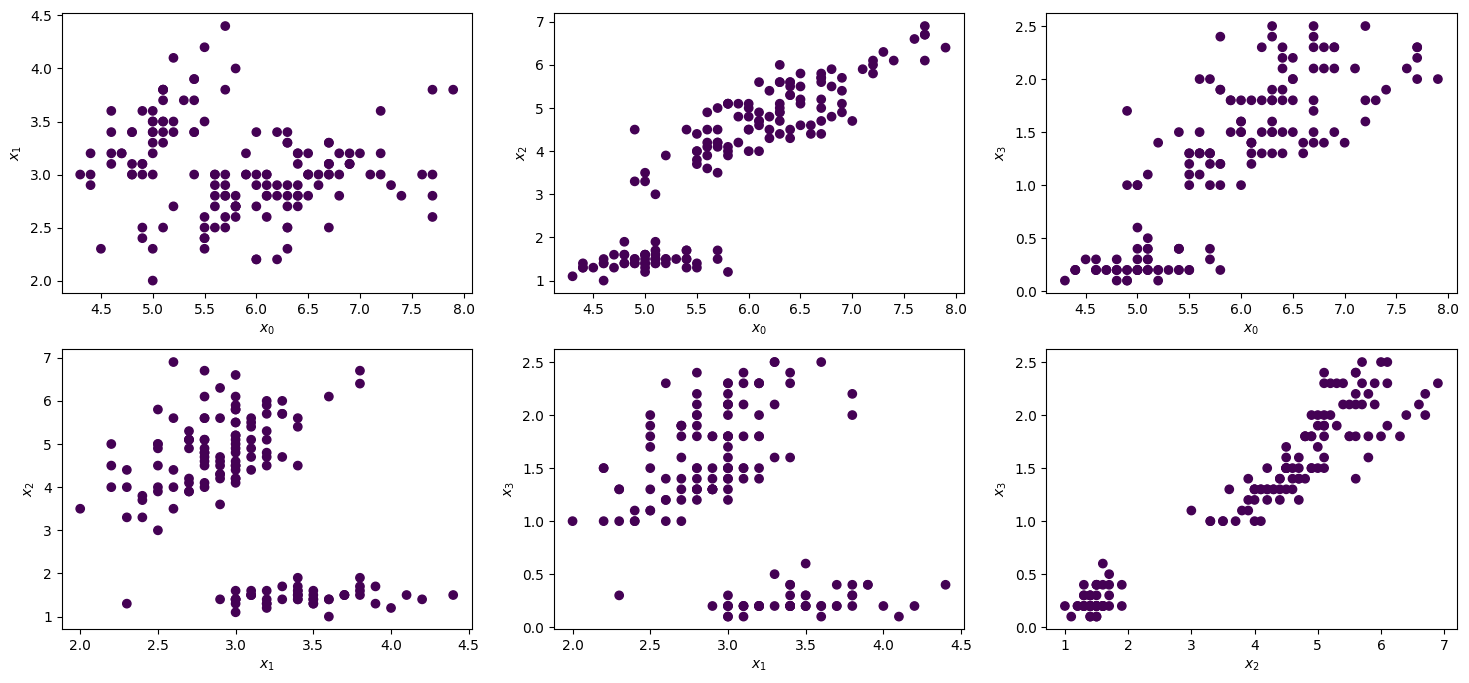

In [9]:
def plot_every_pair(X, colors=None, same_axis=False, label_pfx="x"):
    d = X.shape[1]
    if colors is None:
        colors = np.zeros(X.shape[0])
    n_plots = d*(d-1)//2
    plt.figure(figsize=(3 * max(2, n_plots), 8))
    ct = 0
    for i in range(1, d+1):
        for j in range(i+1, d+1):
            ct += 1
            plt.subplot(2, int(np.ceil(n_plots/2)), ct)
            plt.scatter(X[:, i-1], X[:, j-1], c=colors)
            plt.xlabel('${}_{}$'.format(label_pfx, i-1))
            plt.ylabel('${}_{}$'.format(label_pfx, j-1))
            if same_axis:
                # Use same axis scaling
                plt.xlim([X.min()-1, X.max()+1])
                plt.ylim([X.min()-1, X.max()+1])
    plt.show()

plot_every_pair(X)

Be careful about the different ranges!

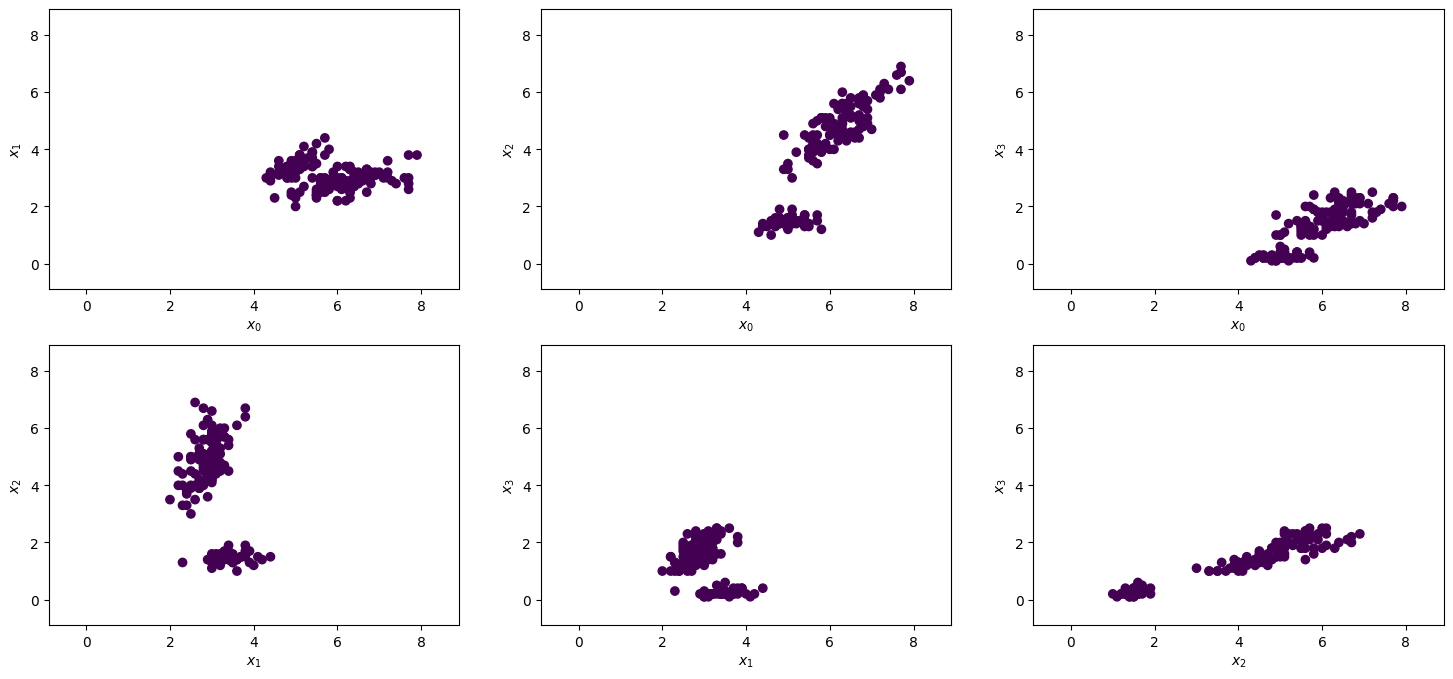

In [10]:
plot_every_pair(X, same_axis=True)

#### Seaborn

A cool package for data visualization is `seaborn`.

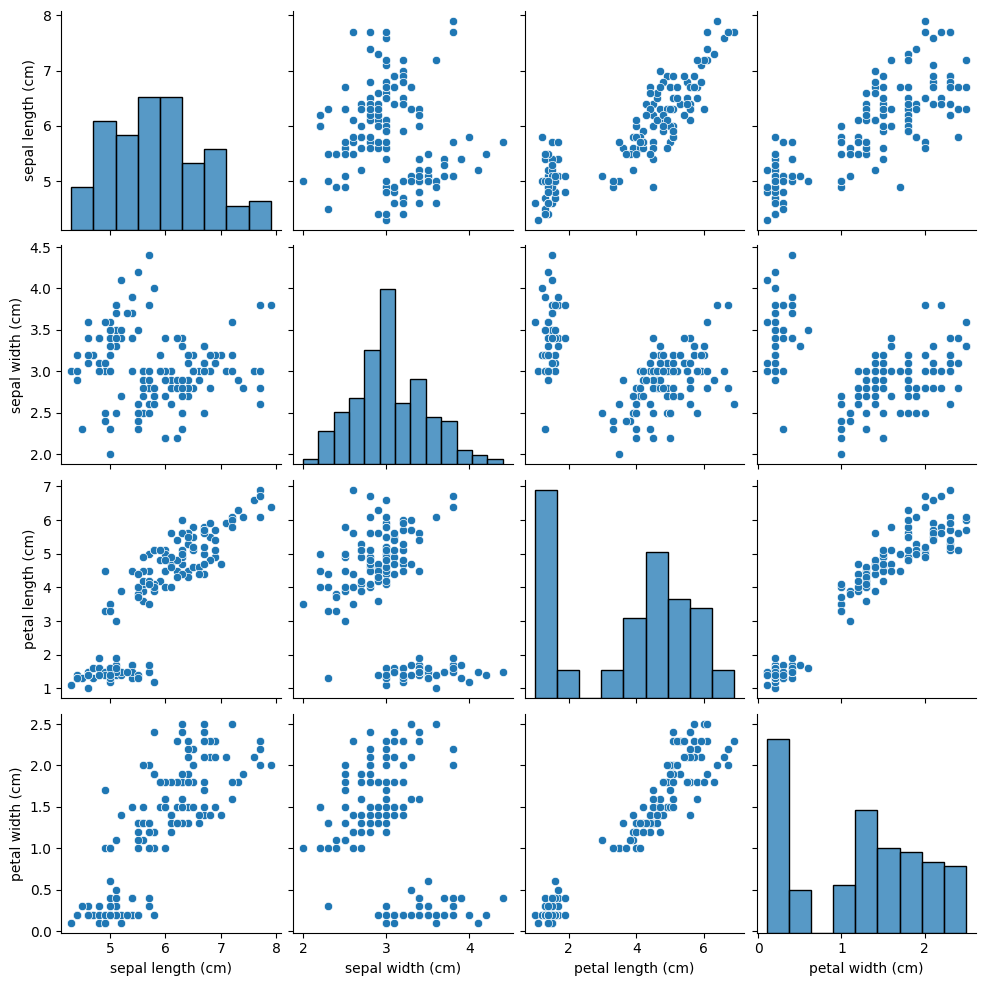

In [11]:
import seaborn as sns
import pandas as pd

sns.pairplot(pd.DataFrame(X, columns=iris.feature_names))

The above visualization is rather difficult when the number of feature is large.

### 7.1.2 Principal Component Analysis

Recall the steps

1. Let $X \in \mathbb{R}^{n \times d}$ be the dataset
1. Subtract the mean. Should we rescale?
  $$ X \leftarrow X - \overline{X} $$
1. Consider the sample covariance matrix
  $$\hat{\Sigma} = \frac{1}{n-1} X^\top X$$
1. Compute the symmetrical and semidefinite positive
  $$H = X^\top X$$
  and its eigen-decomposition
  $$ H = U \Lambda U^\top $$
  where $U \in \mathbb{R}^{d \times d}$ is the eigenvectors matrix and $\Lambda \in \mathbb{R}^{d \times d}$ is the eigenvalues matrix (diagonal).

  **Remark 1:** Eigenvalues and eigenvectors: $H \mathbf u = \lambda \mathbf u$

1. Now apply the transformation
  1. Lossless: apply $U^\top \mathbf x$ to each vector (simple rotation).
  2. Lossy:
    - Discard $l$ eigenvectors obtaining $\tilde{U} \in \mathbb{R}^{d \times d-l}$.
    - apply transformation $\tilde U^\top \mathbf x$ to each vector.

  To transform the entire dataset, simply do $XU$ or $X\tilde U$.



In [12]:
X_mean = np.mean(X, axis=0, keepdims=True)
X0 = X - X_mean

H = (X0.T).dot(X0)
lam, U = np.linalg.eigh(H)

print("shapes:", lam.shape, U.shape)
print("eigenvalues:", lam)

shapes: (4,) (4, 4)
eigenvalues: [  3.55142885  11.65321551  36.15794144 630.0080142 ]


We need to reverse `lam` and `U` since we want the eigenvalues to be sorted in descending order.

Text(0.5, 0, 'component')

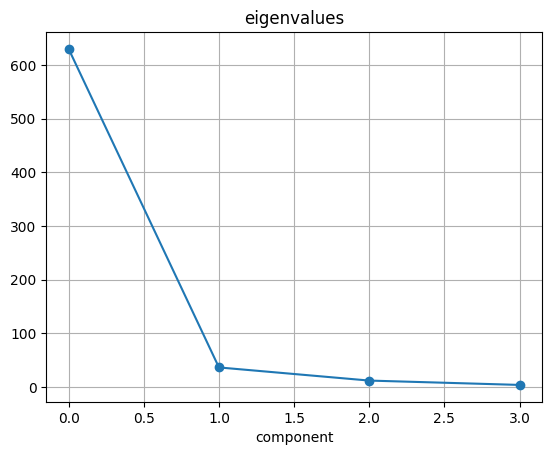

In [13]:
# Sort the eigenvalues
lam = lam[::-1]
U = U[:, ::-1]

plt.plot(lam, 'o-')
plt.title("eigenvalues")
plt.grid()
plt.xlabel("component")

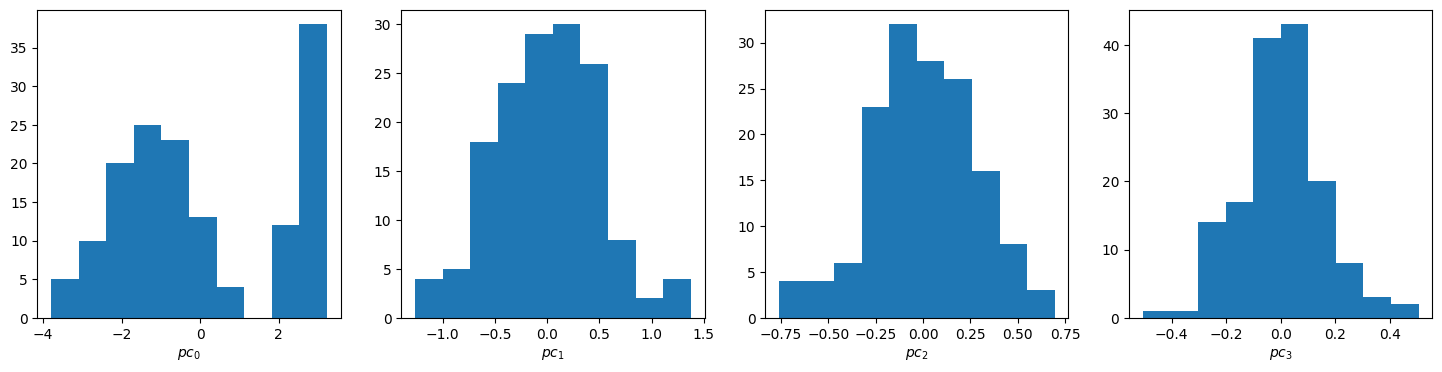

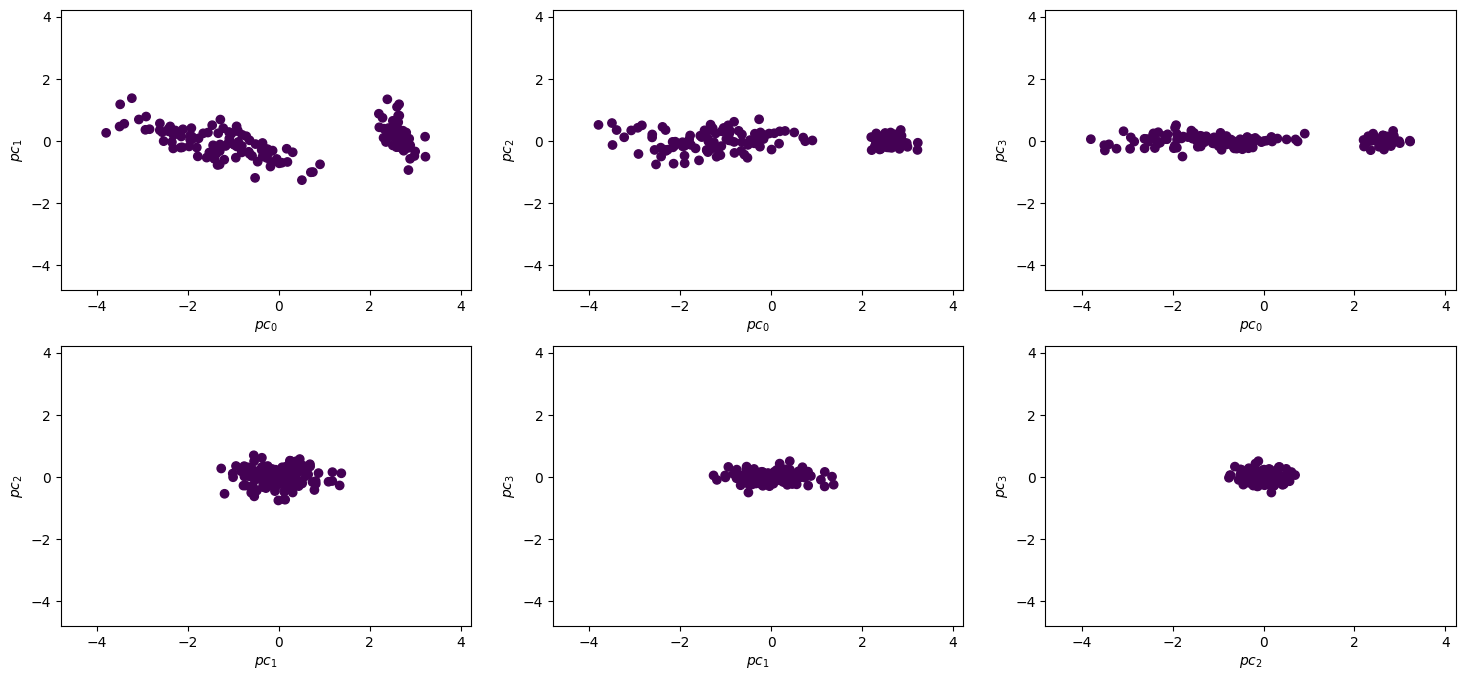

In [14]:
# Apply rotation
X_rot = X0.dot(U)

plt.figure(figsize=(18, 4))
for i in range(d):
    plt.subplot(1, d, i+1)
    plt.hist(X_rot[:, i])
    plt.xlabel('$pc_{}$'.format(i))

plot_every_pair(X_rot, same_axis=True, label_pfx="pc")

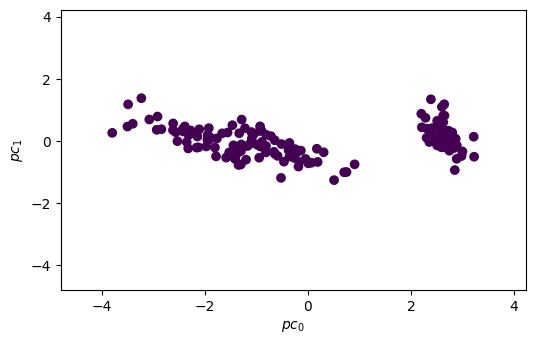

In [15]:
# Apply reduced transformation
l = 2  # columns to discard
Utilde = U[:, :d-l]
X_red = X0.dot(Utilde)
# Equivalent to X_red = X_rot[:, :d-l]

plot_every_pair(X_red, same_axis=True, label_pfx="pc")

As usual, `sklearn` can speed up our work!

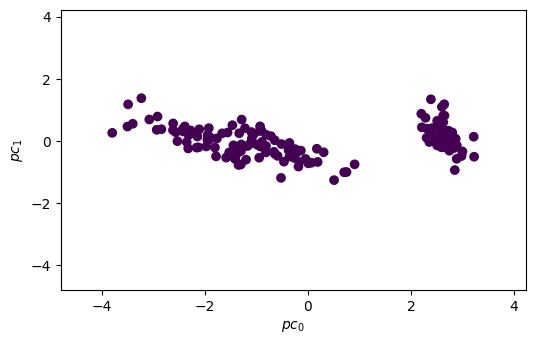

In [16]:
# PCA with sklearn
from sklearn.decomposition import PCA

# d:    num of original features (= num of all principal components)
# l:    num of discarded principal components
# d-l:  num of considered principal components
pca = PCA(n_components=d-l)
pca.fit(X0)
X_red = pca.transform(X0)
X_red[:, 0] = -X_red[:, 0]  # reverse dimension zero since corresponding eigenvector is symmetric wrt our solution

plot_every_pair(X_red, same_axis=True, label_pfx="pc")

### 7.1.3 Data reconstruction

What about if we want to come back to the original number of components?

$$\mathbf x \to \mathbf {\tilde x} \to \mathbf x_{rec} \approx \mathbf x$$

where $\mathbf x \in \mathbb{R}^{d}, \mathbf {\tilde x} \in \mathbb{R}^{d-l}$ and $\mathbf x_{rec} \in \mathbb{R}^{d}$. In this way we are able to **compress** the original data in a low dimensional space and restore them (in a **lossy** way!).

- Transformation: $\mathbf{\tilde x}=\tilde U^\top \mathbf x$.
- Reconstruction (inverse transformation): $\mathbf x_{rec} = \tilde U \mathbf{\tilde x}$.

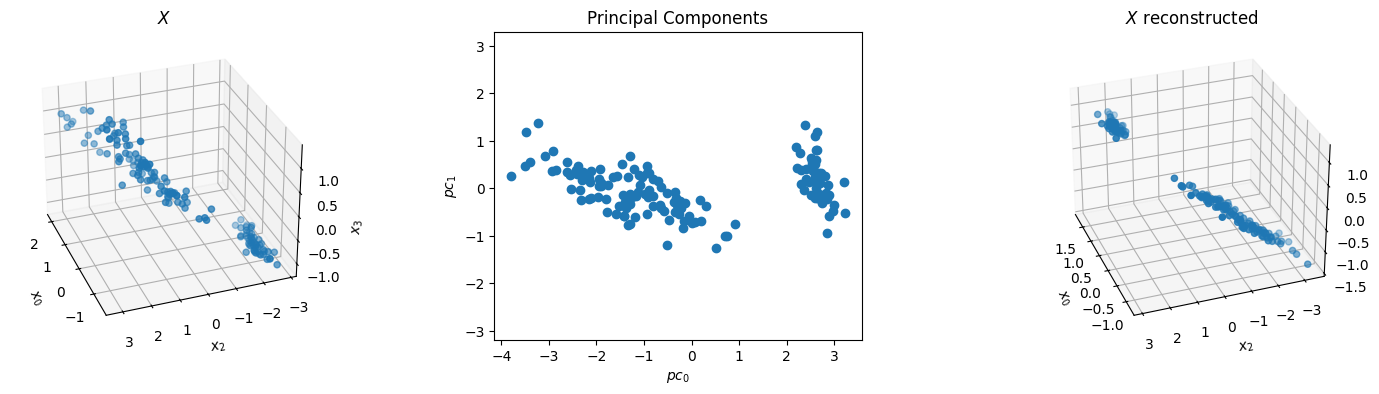

In [17]:
# Visualize original vs reconstructed dataset
fig = plt.figure(figsize=(18, 4))
fig.subplots_adjust(wspace=.4)

# Original dataset
ax = fig.add_subplot(131, projection='3d', elev=30, azim=160)

ax.scatter(X0[:, 0], X0[:, 2], X0[:, 3]) #, X[:, 3])
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title("$X$")

# Principal components
ax = fig.add_subplot(132)
ax.scatter(X_red[:, 0], X_red[:, 1])
ax.set_xlabel('$pc_0$')
ax.set_ylabel('$pc_1$')
ax.set_title("Principal Components")
ax.axis("equal")

# Reconstructed dataset
ax = fig.add_subplot(133, projection='3d', elev=30, azim=160)
# reconstruct
X_rec = pca.inverse_transform(X_red)
# which is equivalent to
# X_red_ = X.dot(Utilde)
# X_rec_ = X_red_.dot(Utilde.T)

ax.scatter(X_rec[:, 0], X_rec[:, 2], X_rec[:, 3]) #, X_rec[:, 3])
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title("$X$ reconstructed")
plt.show()

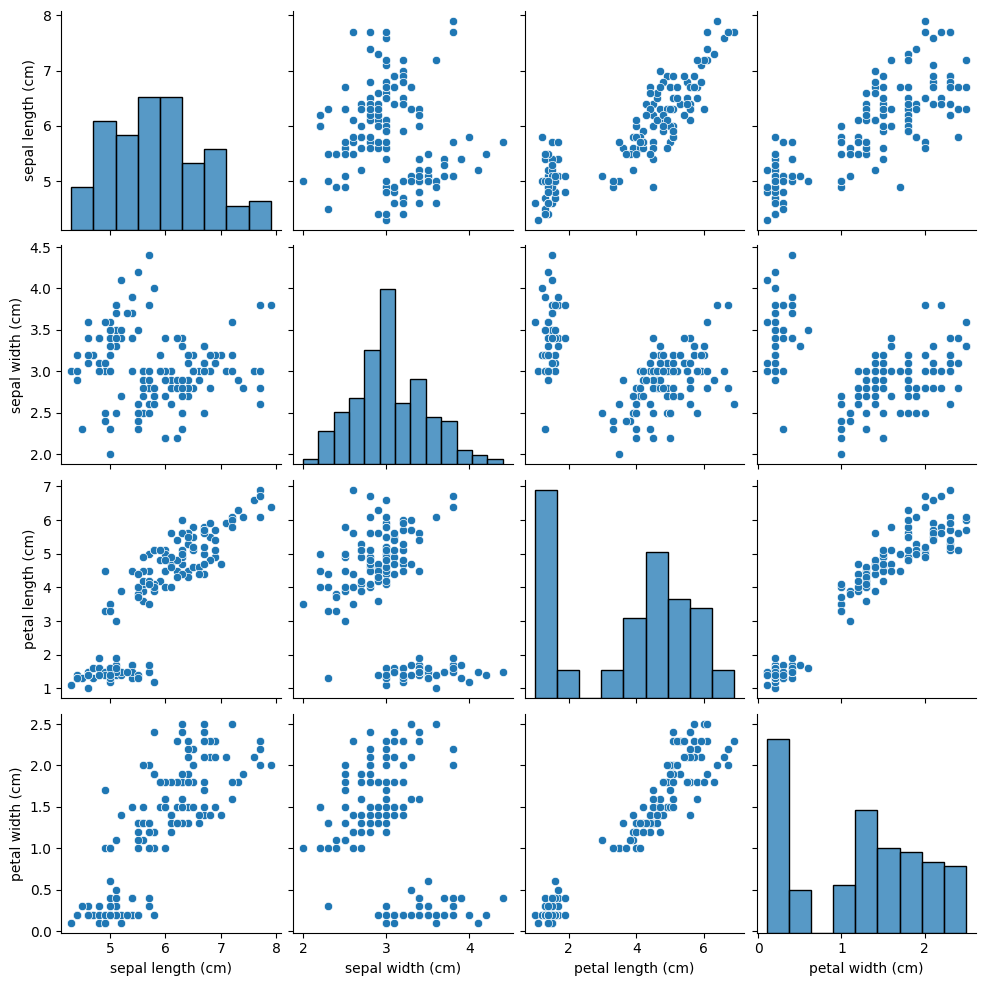

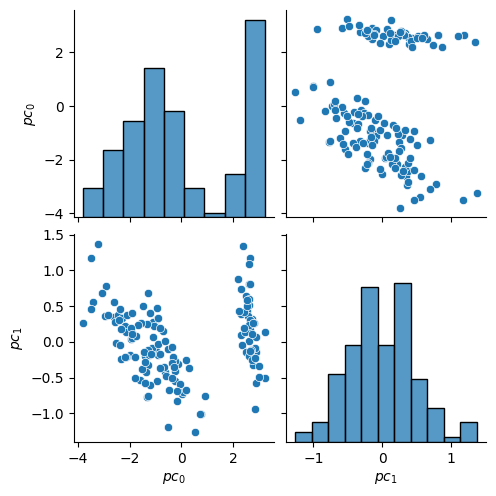

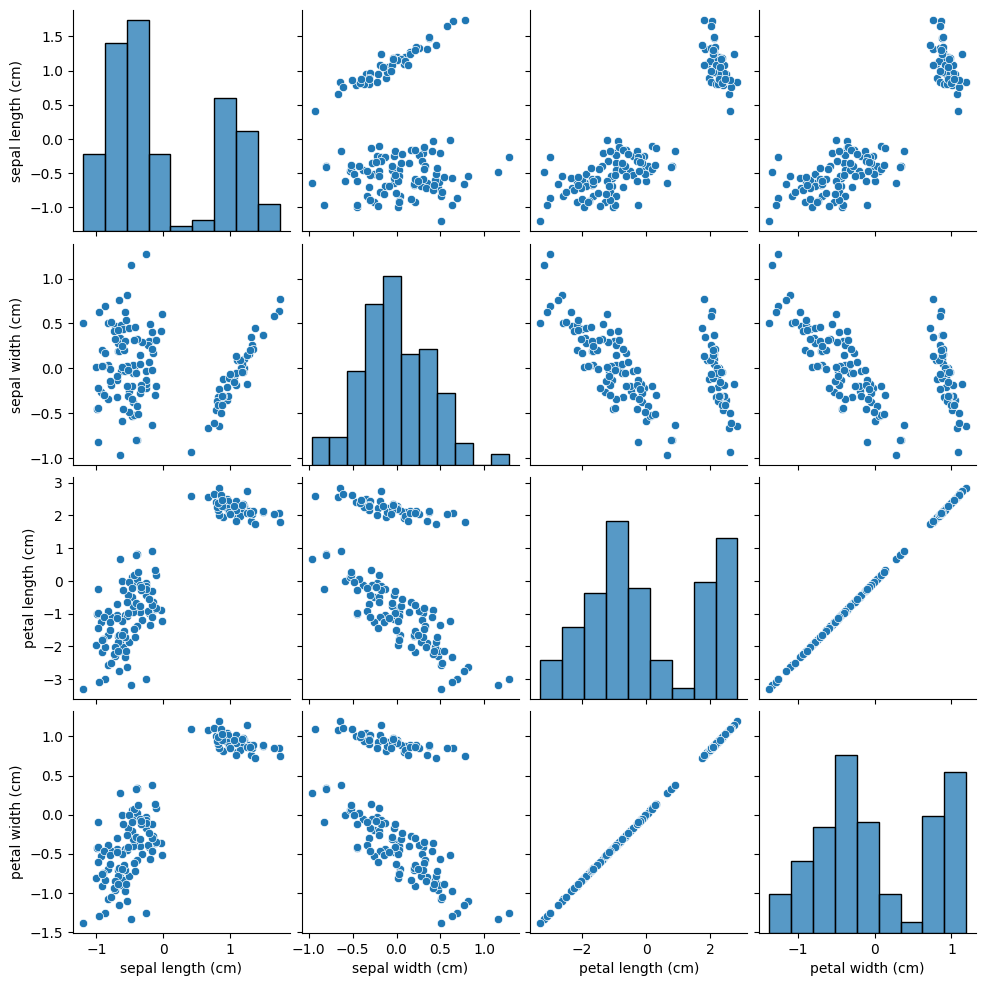

In [18]:
sns.pairplot(pd.DataFrame(X, columns=iris.feature_names))

sns.pairplot(pd.DataFrame(X_red, columns=[f'$pc_{pc}$' for pc in range(d-l)]))

sns.pairplot(pd.DataFrame(X_rec, columns=iris.feature_names))

### 7.1.4 Clustering: k-means

Now that we managed to represent the original dataset in a low dimensional space we can use the $k$-means clustering technique to classify the data into groups.

In [19]:
from sklearn.cluster import KMeans

k_clusters = 2

k_means = KMeans(n_clusters=k_clusters)
cluster_label = k_means.fit_predict(X_red)

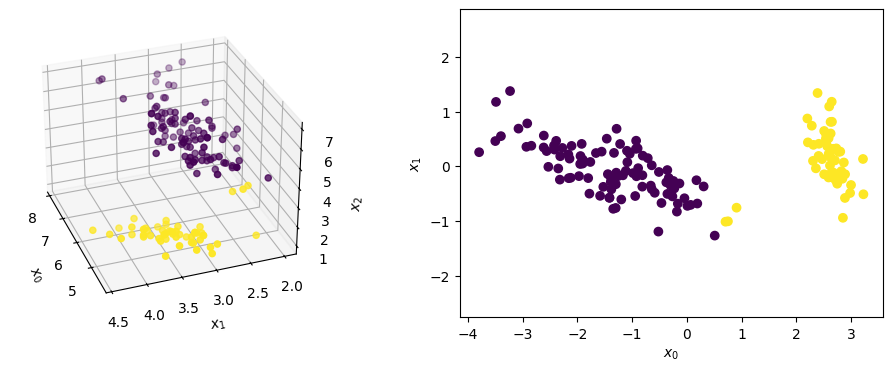

In [20]:
# 3d
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121, projection='3d', elev=30, azim=160)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=cluster_label)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$x_2$')
# 2d PC
ax = fig.add_subplot(122)
ax.scatter(X_red[:, 0], X_red[:, 1], c=cluster_label)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.axis("equal")
plt.show()

Since we know that there are three classes in `iris.target`...

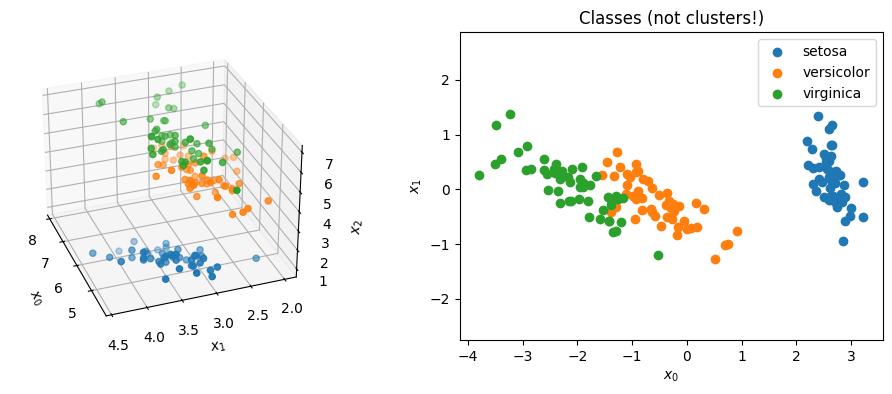

In [21]:
# Plot the real labels
# 3d
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121, projection='3d', elev=30, azim=160)
for c, label in enumerate(iris.target_names):
  idxs = iris.target == c
  ax.scatter(X[idxs, 0], X[idxs, 1], X[idxs, 2], label=label)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('$x_2$')

# 2d PC
ax = fig.add_subplot(122)
for c, label in enumerate(iris.target_names):
  idxs = iris.target == c
  ax.scatter(X_red[idxs, 0], X_red[idxs, 1], label=label)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.axis("equal")
ax.legend()
ax.set_title("Classes (not clusters!)")
plt.show()


However, k-means (as well as any other clustering method) does not necessarily retrieve the same classes, because classes are not necessarily confined into clusters.

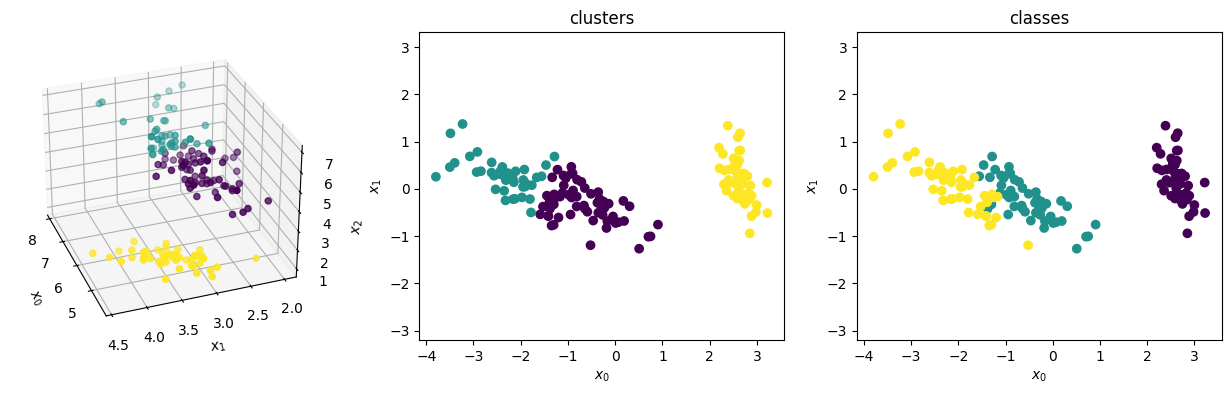

In [22]:
from sklearn.cluster import KMeans

k_clusters = 3

k_means = KMeans(n_clusters=k_clusters)
cluster_label = k_means.fit_predict(X_red)

# 3d
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(131, projection='3d', elev=30, azim=160)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=cluster_label)
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.set_zlabel(r'$x_2$')
# 2d PC
ax = fig.add_subplot(132)
ax.scatter(X_red[:, 0], X_red[:, 1], c=cluster_label)
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.axis("equal")
ax.set_title("clusters")

# classes
ax = fig.add_subplot(133)
ax.scatter(X_red[:, 0], X_red[:, 1], c=iris.target)
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.axis("equal")
ax.set_title("classes")

plt.show()

#### Final considerations

- We can cross-validate the number of clusters ([silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html))
- Variety of clustering methods with different behaviours ([comparison](https://scikit-learn.org/stable/modules/clustering.html#clustering))



## 7.2 Image compression

---

In this part, we will see how we can compress an image dataset, reducing the number of components needed to represent each image.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


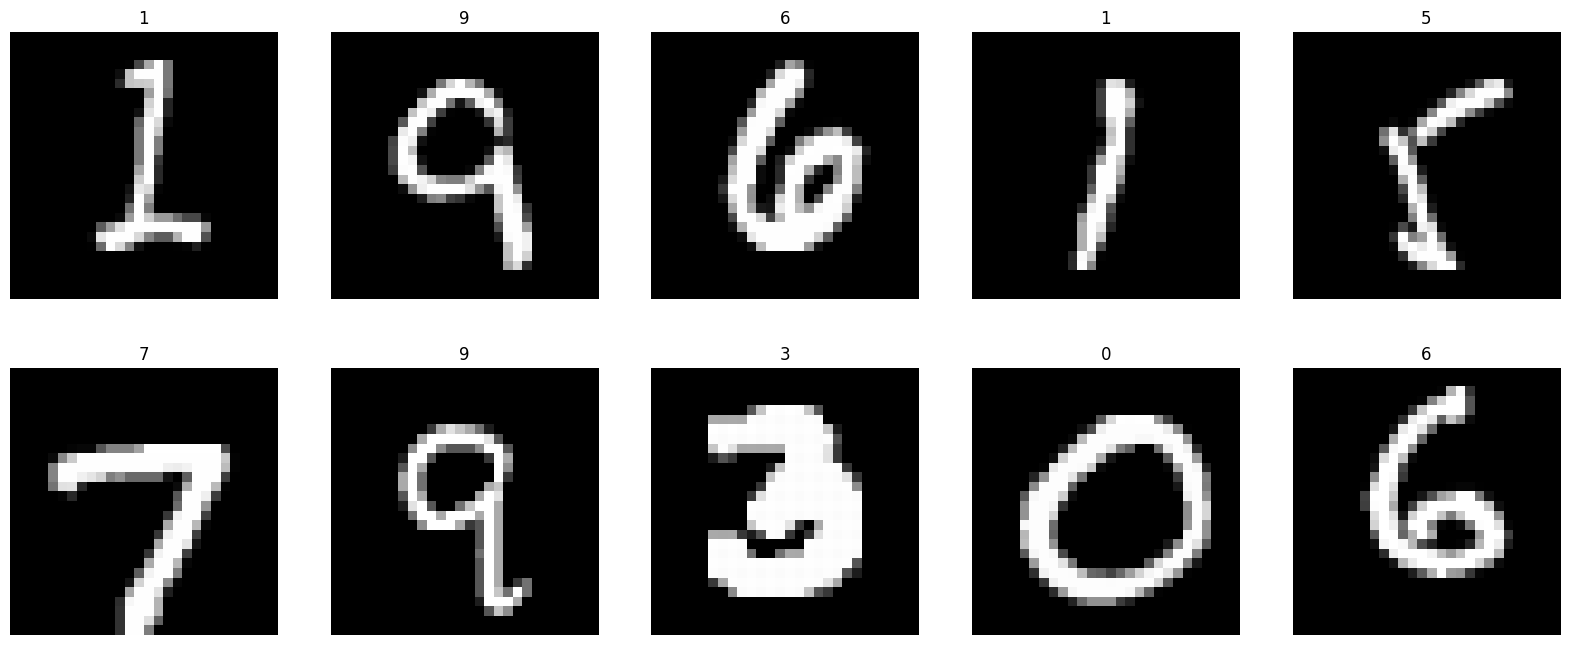

In [23]:
from PIL import Image

dataset = 'mnist'  # 'cifar10'

def plot_sample(imgs, labels, nrows, ncols, resize=None, tograyscale=False, shuffle=True):
    # create a grid of images
    fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    # take a random sample of images
    if shuffle:
        indices = np.random.choice(len(imgs), size=nrows*ncols, replace=False)
    else:
        indices = np.arange(nrows*ncols)
    for ax, idx in zip(axs.reshape(-1), indices):
        ax.axis('off')
        # sample an image
        ax.set_title(labels[idx])
        im = imgs[idx]
        if isinstance(im, np.ndarray):
            im = Image.fromarray(im)
        if resize is not None:
            im = im.resize(resize)
        if tograyscale:
            im = im.convert('L')
        ax.imshow(im, cmap='gray')
    plt.show()

# Load the data
if dataset == 'mnist':
  from tensorflow.keras.datasets import mnist
  (x_train, y_train), _ = mnist.load_data()
elif dataset == 'cifar10':
  from tensorflow.keras.datasets import mnist, cifar10
  (x_train, y_train), _ = cifar10.load_data()
  (x_train, y_train) = (x_train.mean(-1), y_train.mean(-1))  # grayscale

plot_sample(x_train, y_train, 2, 5)

Vectorize the images.

In [24]:
n_samples = 60000
x_train, y_train = x_train[:n_samples], y_train[:n_samples]
print("x_train:", x_train.shape)

# Reshape to vectors and rescale to [0, 1]
w, h = x_train.shape[1:3]
X = x_train.reshape(-1, w * h) /255.
print("X:", X.shape)

x_train: (60000, 28, 28)
X: (60000, 784)


Let's plot the principal components.

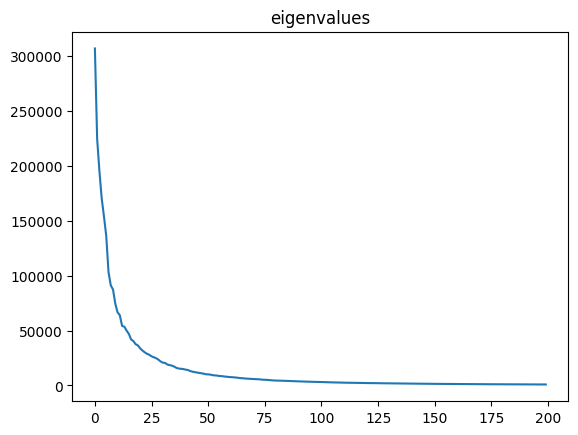

In [25]:
# PCA
n_components = 200

X_mean = X.mean(axis=0, keepdims=True)
X0 = X - X_mean
pca = PCA(n_components=n_components)
pca.fit(X0)

plt.figure()
plt.title('eigenvalues')
plt.plot(pca.singular_values_**2)
plt.show()

Original images


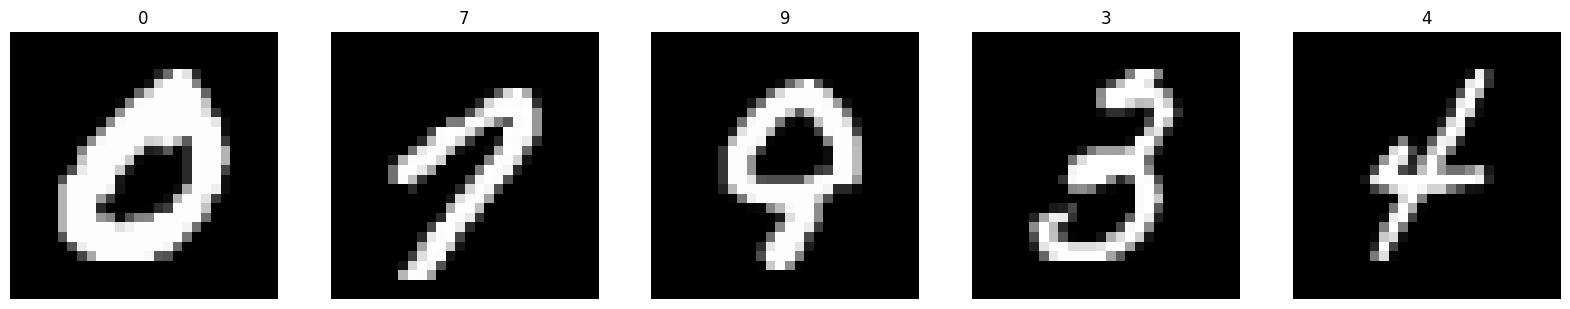

Reconstructed images


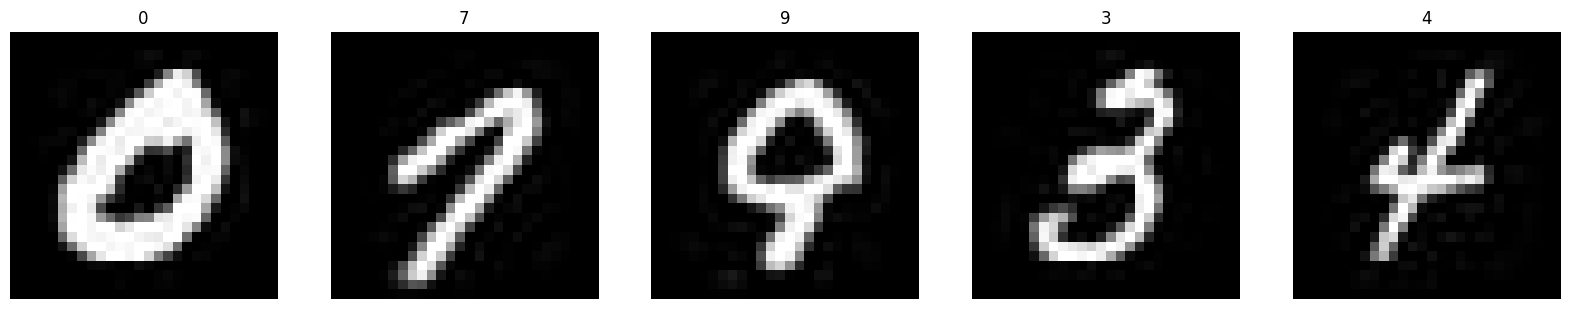

In [26]:
# compress
X_red = pca.transform(X0)
# extract
X_rec = pca.inverse_transform(X_red)
X_rec += X_mean

# reshape to image size and range
x_image_rec = 255 * X_rec.clip(0, 1).reshape(-1, w, h)
x_image_orig = 255 * X.clip(0, 1).reshape(-1, w, h)

# draw some random images
p = np.random.choice(X.shape[0], size=5)
print("Original images")
plot_sample(x_image_orig[p], y_train[p], 1, 5, shuffle=False)
print("Reconstructed images")
plot_sample(x_image_rec[p], y_train[p], 1, 5, shuffle=False)

### Image denoising

It seems that we are able to decently rebuild the original images using way less features! Now what happens if we add noise to the original images?

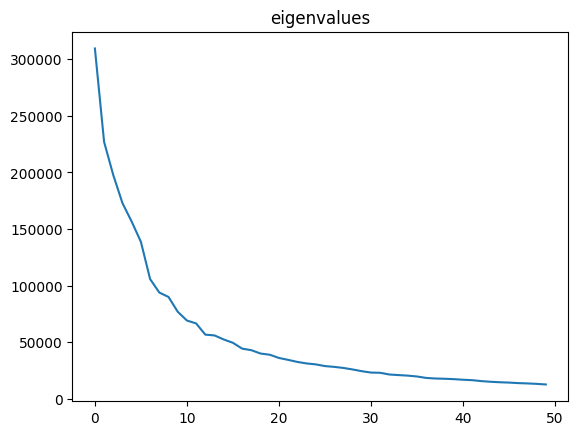

Original images


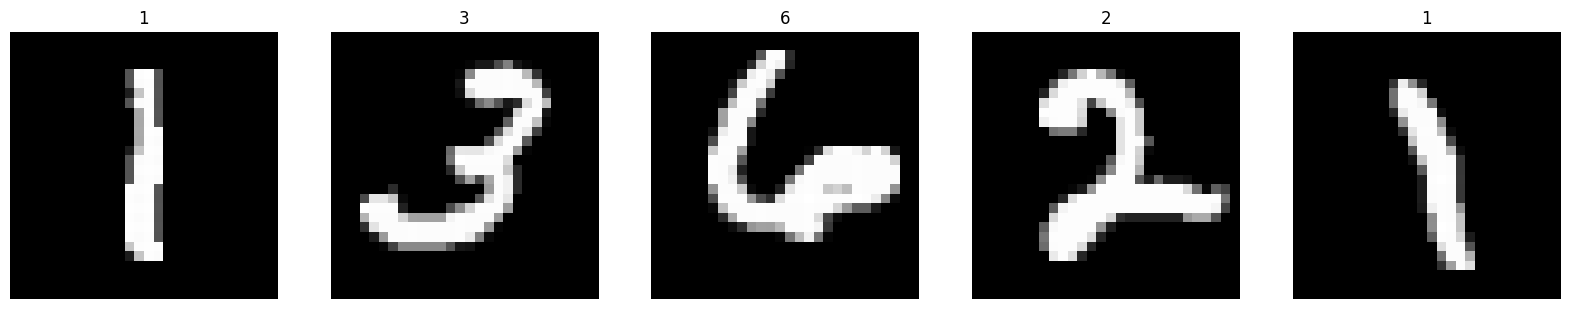

Noisy images


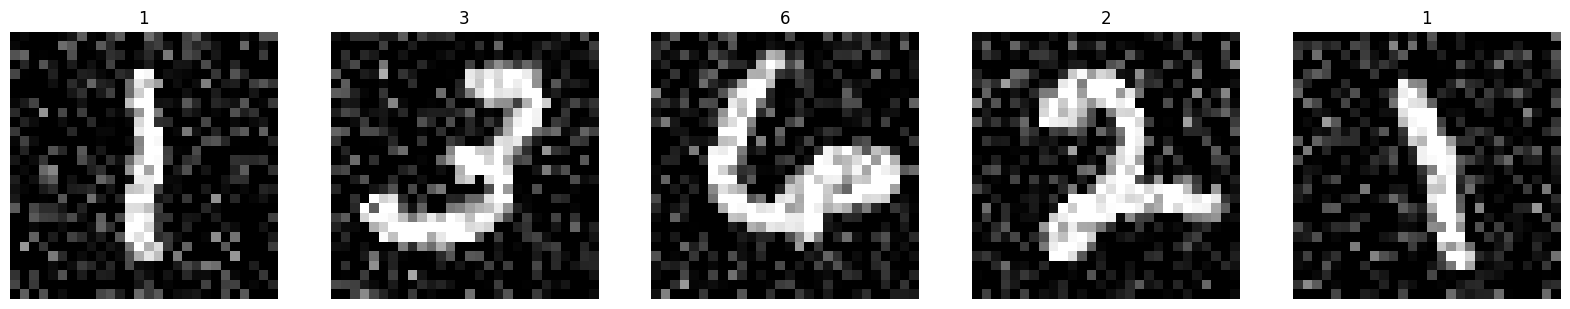

Reconstructed images


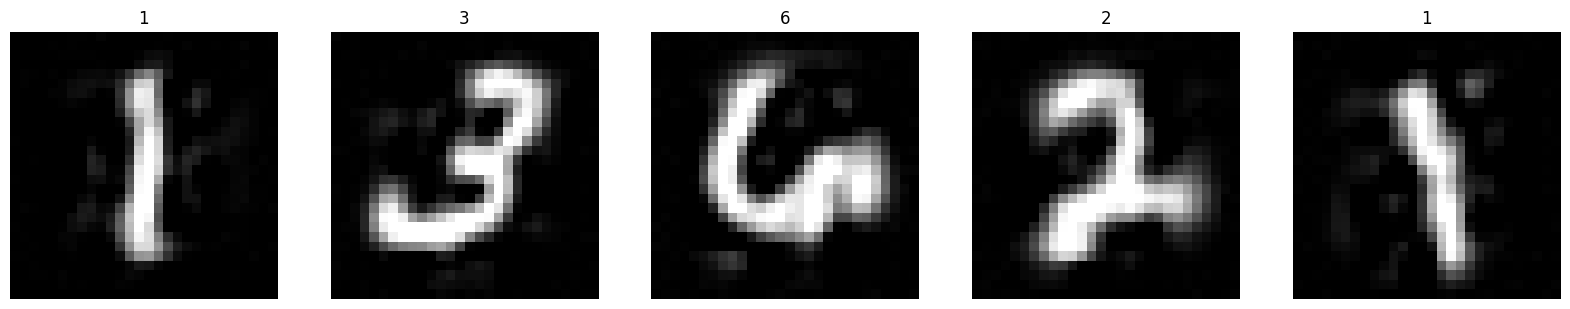

In [27]:
# Add noise to X
X_noisy = X + np.random.randn(*X.shape)*.2

# PCA
n_components = 50
X_mean = X_noisy.mean(axis=0, keepdims=True)
X0 = X_noisy - X_mean
pca = PCA(n_components=n_components)
pca.fit(X0)

plt.figure()
plt.title('eigenvalues')
plt.plot(pca.singular_values_**2)
plt.show()

# compress
X_red = pca.transform(X0)
# extract
X_rec = pca.inverse_transform(X_red)
X_rec += X_mean

# reshape to image size and range
x_image_orig = 255 * X.clip(0, 1).reshape(-1, w, h)
x_image_noisy = 255 * X_noisy.clip(0, 1).reshape(-1, w, h)
x_image_rec = 255 * X_rec.clip(0, 1).reshape(-1, w, h)

# draw some random images
p = np.random.choice(X.shape[0], size=5)
print("Original images")
plot_sample(x_image_orig[p], y_train[p], 1, 5, shuffle=False)
print("Noisy images")
plot_sample(x_image_noisy[p], y_train[p], 1, 5, shuffle=False)
print("Reconstructed images")
plot_sample(x_image_rec[p], y_train[p], 1, 5, shuffle=False)

Now let's see if using only two dimensions we are able to plot the dataset in a clusterized fashion.

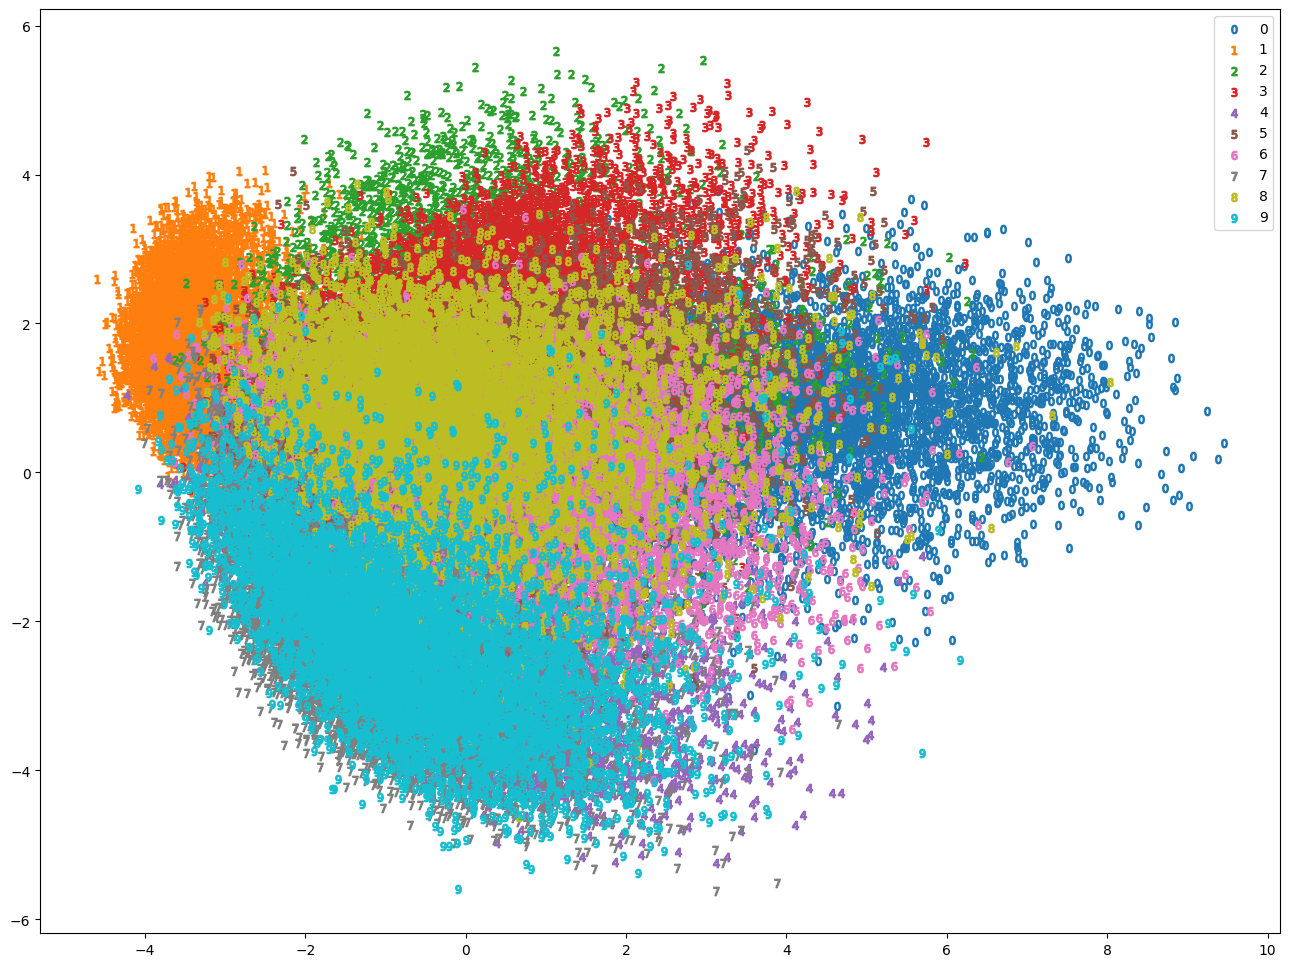

In [28]:
x_dim, y_dim = 0, 1
plt.figure(figsize=(16, 12))
for d in range(10):
    ii = np.where(y_train==d)[0]
    plt.scatter(X_red[ii][:, x_dim], X_red[ii][:, y_dim], marker=f"${d}$", label=d)
plt.legend()
plt.show()